## Part 0: Import packages

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


## Part 1: Read the nCounter csv file

In [2]:
# set the file path

dir_data = './data/'
filename='PBMC.csv'
f_app = os.path.join(dir_data, filename)
print('Path of read in data: %s' % (f_app))
IBD_table = pd.read_csv(f_app)
IBD_table.head()

Path of read in data: ./data/PBMC.csv


,Probe Name,Accession #,NS Probe ID,Class Name,Analyte Type,% Samples above Threshold,Annotation,PBMC mock1,PBMC mock2,PBMC mock3,...,2330L 24h3,2330H 24h1,2330H 24h2,2330H 24h3,2383L 24h1,2383L 24h2,2383L 24h3,2383H 24h1,2383H 24h2,2383H 24h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,NM_001088.2,AANAT,Endogenous,mRNA,0.00,NaN,20.00,20.0,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,NM_005502.3,ABCA1,Endogenous,mRNA,90.38,NaN,198.17,20.0,196.35,...,287.34,123.69,156.41,171.33,138.11,20.00,172.34,20.00,215.43,20.00
4,ABR,NM_001092.4,ABR,Endogenous,mRNA,100.00,NaN,1690.31,2006.9,2453.34,...,1496.39,908.48,957.22,990.03,1161.94,847.87,1098.08,832.25,1186.80,825.96


## Part 2: Data preprocessing

In [3]:
for i in IBD_table.columns[1:7]:
    print(i)
    IBD_table=IBD_table.drop([i], axis=1)

IBD_table.head()

Accession #
NS Probe ID
Class Name
Analyte Type
% Samples above Threshold
Annotation


,Probe Name,PBMC mock1,PBMC mock2,PBMC mock3,2330L 6h1,2330L 6h2,2330L 6h3,2330H 6h1,2330H 6h2,2330H 6h3,...,2330L 24h3,2330H 24h1,2330H 24h2,2330H 24h3,2383L 24h1,2383L 24h2,2383L 24h3,2383H 24h1,2383H 24h2,2383H 24h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,20.00,20.0,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,198.17,20.0,196.35,190.67,230.51,326.19,257.34,259.93,302.55,...,287.34,123.69,156.41,171.33,138.11,20.00,172.34,20.00,215.43,20.00
4,ABR,1690.31,2006.9,2453.34,1743.31,1977.31,1432.55,1877.78,2051.75,1710.45,...,1496.39,908.48,957.22,990.03,1161.94,847.87,1098.08,832.25,1186.80,825.96


In [4]:
# get the samples colunm names

cl_list=[]
for i in IBD_table.columns[1:]:

    if i[:-1] in cl_list:
        continue
    else:
        cl_list.append(i[:-1])
        
print(cl_list)

['PBMC mock', '2330L 6h', '2330H 6h', '2383L 6h', '2383H 6h', '2330L 24h', '2330H 24h', '2383L 24h', '2383H 24h']


In [5]:
table_col=['Probe Name']
table_col.extend(cl_list)
len(table_col)
len(IBD_table['Probe Name'][2:])

171

## Part 3: Mean of Mock

In [6]:
# the mean of MOCK
for j in cl_list[0:]:
    mean_col=[]
    std_col=[]
    for i in range(2, len(IBD_table['Probe Name'])):
        var_list=[]
        var_list.append(float(IBD_table[j+'1'][i]))
        var_list.append(float(IBD_table[j+'2'][i]))
        var_list.append(float(IBD_table[j+'3'][i]))
        
        df_group_test=pd.DataFrame(var_list)
        mean_col.append(float(df_group_test.mean().get_values()))
        
    if j == cl_list[0]:
        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
        df_m_0=pd.DataFrame(mean_col)
        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)       
        
    else:
        n=1
        while n <= 3:
            df_m_0=pd.DataFrame(list(IBD_table[j+str(n)][2:]))
            df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)
            n+=1
        
table_index=[]
for i in IBD_table['Probe Name'][2:]:
    table_index.append(i)
df_index=pd.DataFrame({'index':table_index})
df1_m_test0=df1_m_test0.rename(index=df_index['index'])
table_col=['Probe Name', 'MOCK']
table_col.extend(IBD_table.columns[4:])
df1_m_test0.columns=table_col
df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

df1_m_test0.head()

,MOCK,2330L 6h1,2330L 6h2,2330L 6h3,2330H 6h1,2330H 6h2,2330H 6h3,2383L 6h1,2383L 6h2,2383L 6h3,...,2330L 24h3,2330H 24h1,2330H 24h2,2330H 24h3,2383L 24h1,2383L 24h2,2383L 24h3,2383H 24h1,2383H 24h2,2383H 24h3
AANAT,20.000000,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
ABCA1,138.173333,190.67,230.51,326.19,257.34,259.93,302.55,167.24,180.54,263.28,...,287.34,123.69,156.41,171.33,138.11,20.00,172.34,20.00,215.43,20.00
ABR,2050.183333,1743.31,1977.31,1432.55,1877.78,2051.75,1710.45,1314.03,2015.86,1425.35,...,1496.39,908.48,957.22,990.03,1161.94,847.87,1098.08,832.25,1186.80,825.96
ACC (ACACA),20.000000,20.00,73.48,20.00,20.00,20.00,20.00,20.00,72.36,20.00,...,20.00,20.00,20.00,20.00,36.42,20.00,20.00,20.00,20.00,20.00
AIFM1,172.150000,195.21,194.88,182.34,231.41,182.50,252.48,253.76,168.88,210.45,...,202.41,200.46,187.54,187.74,155.06,135.45,193.00,239.72,177.06,196.71


## Part 4: Normalization: samples / mock

In [7]:
# Normalization: samples / mock

for i in range(0,len(df1_m_test0.columns)):
    temp=[]
    for j in range(len(table_index)):

        a=df1_m_test0.at[table_index[j],df1_m_test0.columns[i]]
        b=df1_m_test0.at[table_index[j],df1_m_test0.columns[0]]
        val=float(a)/float(b)
        temp.append(val)
        
    if i == 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=df_temp
    if i > 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=pd.concat([ndf1_test, df_temp], axis=1)
        
ndf1_test.columns=table_col[1:]
df_index=pd.DataFrame({'index':table_index})
ndf1_test=ndf1_test.rename(index=df_index['index'])
ndf1_test.head()

,MOCK,2330L 6h1,2330L 6h2,2330L 6h3,2330H 6h1,2330H 6h2,2330H 6h3,2383L 6h1,2383L 6h2,2383L 6h3,...,2330L 24h3,2330H 24h1,2330H 24h2,2330H 24h3,2383L 24h1,2383L 24h2,2383L 24h3,2383H 24h1,2383H 24h2,2383H 24h3
AANAT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,1.379933,1.668267,2.360730,1.862443,1.881188,2.189641,1.210364,1.306620,1.905433,...,2.079562,0.895180,1.131984,1.239964,0.999542,0.144746,1.247274,0.144746,1.559129,0.144746
ABR,1.0,0.850319,0.964455,0.698742,0.915908,1.000764,0.834291,0.640933,0.983258,0.695231,...,0.729881,0.443121,0.466895,0.482898,0.566749,0.413558,0.535601,0.405939,0.578875,0.402871
ACC (ACACA),1.0,1.000000,3.674000,1.000000,1.000000,1.000000,1.000000,1.000000,3.618000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.821000,1.000000,1.000000,1.000000,1.000000,1.000000
AIFM1,1.0,1.133953,1.132036,1.059193,1.344235,1.060122,1.466628,1.474063,0.981005,1.222480,...,1.175777,1.164450,1.089399,1.090561,0.900726,0.786814,1.121115,1.392507,1.028522,1.142666


## Part 5: Mean of samples ( with 3 replicates )

In [8]:
######
# Mean
######


for j in cl_list:
    
    mean_col=[]
    std_col=[]
    
    mock_list=[1,1,1]
    p_list=[]
    
    for i in table_index:
        
        if j == cl_list[0]:
            var_list=[1,1,1]
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))
        
        else:
            var_list=[]
            var_list.append(float(ndf1_test[j+'1'][i]))
            var_list.append(float(ndf1_test[j+'2'][i]))
            var_list.append(float(ndf1_test[j+'3'][i]))
        
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))   

            p_value=ttest_ind(mock_list, var_list)[1]
            p_list.append(p_value)
            
    if j == cl_list[0]:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=df_m_0

        df_s_0=pd.DataFrame(std_col)
        df1_std=df_s_0       
        
    else:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=pd.concat([df1_mean, df_m_0], axis=1)

        df_s_0=pd.DataFrame(std_col)
        df1_std=pd.concat([df1_std, df_s_0], axis=1)
        
        if j == cl_list[1]:
            df1_p=pd.DataFrame(p_list)
        else:
            df_p_0=pd.DataFrame(p_list)
            df1_p=pd.concat([df1_p, df_p_0], axis=1)

df_index=pd.DataFrame({'index':table_index})
df1_mean=df1_mean.rename(index=df_index['index'])
table_col=[]
table_col.extend(cl_list)
df1_mean.columns=cl_list

# output the file with mean
#df1_mean.to_csv('nCounter_mean_table.csv')
df1_mean.head()


,PBMC mock,2330L 6h,2330H 6h,2383L 6h,2383H 6h,2330L 24h,2330H 24h,2383L 24h,2383H 24h
AANAT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,1.802977,1.977757,1.474139,1.265319,1.560504,1.089043,0.797187,0.616207
ABR,1.0,0.837839,0.916988,0.773141,0.662333,0.766250,0.464305,0.505303,0.462562
ACC (ACACA),1.0,1.891333,1.000000,1.872667,1.000000,1.615833,1.000000,1.273667,1.000000
AIFM1,1.0,1.108394,1.290328,1.225850,1.102643,1.256753,1.114803,0.936218,1.187898


In [46]:
#for j in cl_list[0:]:
#    mean_col=[]
#    std_col=[]
#    for i in range(2, len(IBD_table['Probe Name'])):
#        var_list=[]
#        var_list.append(float(IBD_table[j+'1'][i]))
#        var_list.append(float(IBD_table[j+'2'][i]))
#        var_list.append(float(IBD_table[j+'3'][i]))
#        
#        df_group_test=pd.DataFrame(var_list)
#        mean_col.append(float(df_group_test.mean().get_values()))
#        std_col.append(float(df_group_test.std().get_values()))
#        #print(j, var_list, float(df_group_test.mean().get_values()))
#        
#    if j == cl_list[0]:
#        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df_index_col, df_s_0], axis=1)        
        
#    else:
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df1_s_test0, df_s_0], axis=1)
        
        #print(IBD_table['Probe Name'][i], IBD_table[j+'1'][i],IBD_table[j+'2'][i],IBD_table[j+'3'][i])
        #print(IBD_table['Probe Name'][i], IBD_table[j][i])

        
#table_index=[]
#for i in IBD_table['Probe Name'][2:]:
#    table_index.append(i)
#df_index=pd.DataFrame({'index':table_index})
#df1_m_test0=df1_m_test0.rename(index=df_index['index'])
#table_col=['Probe Name']
#table_col.extend(cl_list)
#df1_m_test0.columns=table_col
#df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

#df1_m_test0

## Part 6: Standard deviation of samples

In [9]:
#####################
# standard deviation
#####################

df_index=pd.DataFrame({'index':table_index})
df1_std=df1_std.rename(index=df_index['index'])
df1_std.columns=cl_list

# output the std file
#df1_std.to_csv('nCounter_std_table.csv')
df1_std.head()

,PBMC mock,2330L 6h,2330H 6h,2383L 6h,2383H 6h,2330L 24h,2330H 24h,2383L 24h,2383H 24h
AANAT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA1,0.0,0.504084,0.183736,0.376600,0.307511,0.459228,0.176358,0.578448,0.816594
ABR,0.0,0.133295,0.083242,0.183981,0.086797,0.133714,0.020015,0.080965,0.100742
ACC (ACACA),0.0,1.543835,0.000000,1.511503,0.000000,1.066655,0.000000,0.474005,0.000000
AIFM1,0.0,0.042620,0.208545,0.246546,0.114703,0.339418,0.042999,0.169953,0.186160


## Part 7: p-value of samples

In [10]:
df_index=pd.DataFrame({'index':table_index})
df1_p=df1_p.rename(index=df_index['index'])
df1_p.columns=cl_list[1:]

# out the p-value file
#df1_p.to_csv('nCounter_p_table.csv')
df1_p.head()

,2330L 6h,2330H 6h,2383L 6h,2383H 6h,2330L 24h,2330H 24h,2383L 24h,2383H 24h
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCA1,0.050899,0.000770,0.094676,0.209380,0.102026,0.431206,0.576448,0.461300
ABR,0.102822,0.159190,0.099566,0.002528,0.038862,0.000001,0.000451,0.000763
ACC (ACACA),0.373901,NaN,0.373901,NaN,0.373901,NaN,0.373901,NaN
AIFM1,0.011646,0.073452,0.187780,0.196089,0.260297,0.009849,0.551124,0.155339


## Part 8: Heatmap of samples

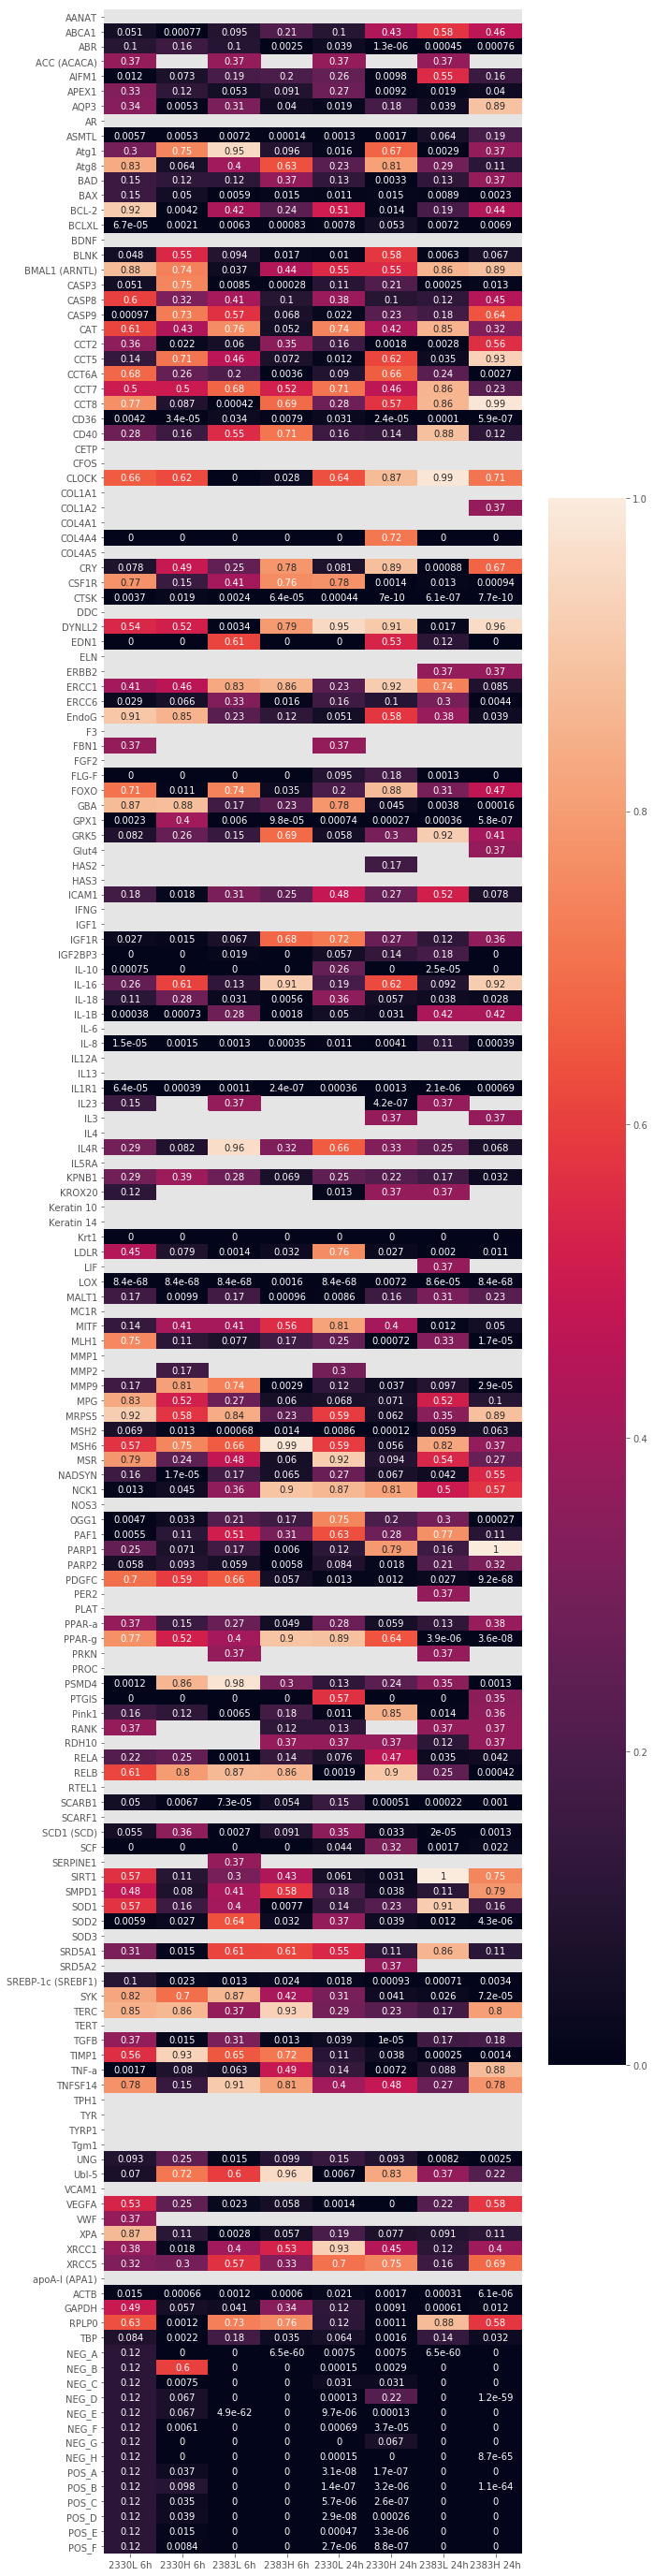

In [13]:
plt.figure(figsize=(10,50))
heatmap = sns.heatmap(data=df1_p, vmin = 0, annot = True, vmax = 1)
file_heatmap = "Heatmap_" + filename[:-4] + ".png"
plt.savefig(file_heatmap)
plt.show()
#annot = True,

## Part 9: Define the genetic groups

In [14]:
G1=['SOD1','SOD2','GPX1','CAT']
G2=['CCT2','CCT5','CCT6A','CCT7','CCT8','Pink1', 'Atg1','Atg8','SIRT1','FOXO','PARP1','PARP2','NADSYN','MRPS5','Ubl-5','SOD3'] #,'Parkin'
G3=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6']
G4=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a']
G5=['IL-1B','IL-6','IL-8','SOD1','SOD2','GPX1']
G6=['VEGFA','CASP3','CASP8','IL-1B','IL-8','TNF-a']
G7=['TYR','TYRP1','MC1R','MITF']
G8=['COL1A1','COL1A2','COL4A1','COL4A4','COL4A5','MMP1','MMP9','MMP2','TIMP1','ELN','FBN1','LOX','HAS2','HAS3']
G9=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a','IL-16','IL23','IL12A','IFNG','TGFB','IL3','IL4']
G10=['BCL-2','BAX','BCLXL','BAD','CASP9','AIFM1','EndoG']
G11=['PTGIS','NOS3','EDN1','PLAT','PROC','VWF','F3','SERPINE1','PDGFC','FGF2','IGF2BP3','IGF1R','IL-8','IL-6','ICAM1','VCAM1','CASP8']
G12=['SIRT1','CLOCK','BMAL1 (ARNTL)','PER2','CRY','KPNB1']
G13=['ICAM1','VCAM1','IL-8','NOS3']
G14=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6','SOD1','SOD2','GPX1','CAT']
G15=['Tgm1','Krt1','Keratin 10','Keratin 14','AQP3','FLG-F','SMPD1','GBA','HAS2','HAS3']
G16=['SREBP-1c (SREBF1)','PPAR-g','PPAR-a','SCD1 (SCD)','ACC (ACACA)']
G17=['CETP','SCARB1','apoA-I (APA1)','LDLR','ABCA1']
G18=['SRD5A1','SRD5A2','AR','KROX20','SCF','VEGFA','IGF1','TGFB','BDNF']
G19=['TERT','TERC','RTEL1']
G20=['CD40','ERBB2','LIF','MALT1','NCK1','PAF1','DYNLL2','GRK5','PSMD4','RDH10','RELB','SCARF1','TNFSF14','ABR','IL13','IL4R','IL5RA','RELA']

In [16]:
gene_fun_dic={'DG1':'抗氧化', 'DG2':'抗老', 'DG3':'DNA修復', 'DG4':'免疫', 'DG5':'護胃', 'DG6':'護眼', 'DG7':'美白-抗黑色素生成',
              'DG8':'膠原蛋白合成組合降解', 'DG9':'抗發炎', 'DG10':'細胞凋亡', 'DG11':'心血管保健', 'DG12':'晝夜節律',
              'DG13':'LPS模擬發炎反應', 'DG14':'非酒精性肝損傷', 'DG15':'皮膚角質保濕', 'DG16':'脂肪肝', 'DG17':'提升HDL', 
              'DG18':'健髮', 'DG19':'端粒酶活性', 'DG20':'呼吸道過敏'}


## Part 10: Barplots of each genetic groups

In [ ]:
# barplots of each samples

whole_group=[G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20]

from matplotlib.font_manager import FontProperties # 步驟一
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

n=0
while n < len(whole_group):
    G_Name=whole_group[n]
    for i in range(len(G_Name)):
        if i == 0:
            plot_df=df1_mean.loc[G_Name[i]]
            std_df=df1_std.loc[G_Name[i]]
        else:
            plot_temp=df1_mean.loc[G_Name[i]]
            plot_df=pd.concat([plot_df, plot_temp], axis=1)
            
            std_temp=df1_std.loc[G_Name[i]]
            std_df=pd.concat([std_df, std_temp], axis=1)            
            
            plot_df_t=plot_df.transpose()
            std_df_t=std_df.transpose()
    
    current_palette = sns.cubehelix_palette(len(df1_mean.columns), start=.5, rot=-.75)
    
    fig, ax = plt.subplots(figsize=(20,8))
    with sns.color_palette(current_palette):
        plot_df_t.plot.bar(yerr=std_df_t, ax=ax, capsize=2)
        ax.set_facecolor('xkcd:salmon')
        ax.set_facecolor((1.0, 1, 1))
        #ax.set(xlabel=gene_fun_dic['DG'+str(n+1)], ylabel='Relative Expression Ratio')
        plt.xlabel(gene_fun_dic['DG'+str(n+1)], fontproperties=font)
        plt.ylabel("Relative Expression Ratio", fontproperties=font)
        #plt.title("標題", fontproperties=font)

        
        #建立 p-value 和 std 轉置表格
        for i in range(len(G_Name)):
            if i == 0:    
                p_df=df1_p.loc[G_Name[i]]
            else:
                p_temp=df1_p.loc[G_Name[i]]
                p_df=pd.concat([p_df, p_temp], axis=1)
        df_p_t=p_df.transpose()
        
        #建立對應n值的 p-value 和 std list
        pt_list=[]
        for i in range(len(plot_df_t[plot_df_t.columns[0]])):
            pt_list.append(1)

        for i in df_p_t.columns:
            for j in df_p_t.index:
                pt_list.append(df_p_t.at[j, i])
        #---------------------------------------------------#
        std_t_list=[]
        for i in std_df_t.columns:
            for j in std_df_t.index:
                std_t_list.append(std_df_t.at[j, i])
        m=0
        while m < len(ax.patches):
            r=ax.patches[m]
            if r.get_height() <= 500 and r.get_height() >1:
                if pt_list[m] <= 0.05 and pt_list[m] >= 0.01:
                    ax.text(r.get_x(),                 # x-position
                        r.get_height()+std_t_list[m] , # y-position 記得還要加std
                        '*', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.01 and pt_list[m] >= 0.001:
            
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] , # y
                        '**', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.001:
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] ,   # y
                        '***', # text
                        fontsize=15, family="monospace", zorder=10)
            m+=1
        plt.savefig('nCounter_G'+str(n+1)+'.png')
        plt.show()
    
    n+=1

## Part 11: Label the statistic result with genetic groups

In [19]:
gene_fun_dic={'G1':'抗氧化', 'G2':'抗老', 'G3':'DNA修復', 'G4':'免疫', 'G5':'護胃', 'G6':'護眼', 'G7':'美白-抗黑色素生成',
              'G8':'膠原蛋白合成組合降解', 'G9':'抗發炎', 'G10':'細胞凋亡', 'G11':'心血管保健', 'G12':'晝夜節律',
              'G13':'LPS模擬發炎反應', 'G14':'非酒精性肝損傷', 'G15':'皮膚角質保濕', 'G16':'脂肪肝', 'G17':'提升HDL', 
              'G18':'健髮', 'G19':'端粒酶活性', 'G20':'呼吸道過敏'}


In [20]:
####################
# Add the group name
####################

# concate all the gene with group order

gene = G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 + G11 + G12 + G13 + G14 + G15 + G16 + G17 + G18 + G19 + G20
gene_group = ["G1"]*len(G1) + ["G2"]*len(G2) + ["G3"]*len(G3) + ["G4"]*len(G4) + ["G5"]*len(G5) + ["G6"]*len(G6) + ["G7"]*len(G7) + ["G8"]*len(G8) + ["G9"]*len(G9) + ["G10"]*len(G10) + ["G11"]*len(G11) + ["G12"]*len(G12) + ["G13"]*len(G13) + ["G14"]*len(G14) + ["G15"]*len(G15) + ["G16"]*len(G16) + ["G17"]*len(G17) + ["G18"]*len(G18) + ["G19"]*len(G19) + ["G20"]*len(G20) 


# add the group chinese name
gene_group_CN = []
for i in range(len(gene_group)):
    
    gene_group_CN.append(gene_fun_dic[gene_group[i]])


## Part 12: Ordered mean of samples

In [21]:
#####################    
# mean in group order
#####################

mean = []
for i in range(len(gene)):
    mean.append(df1_mean.loc[gene[i]])
    
    
df_mean = pd.DataFrame(mean)
df_mean['Gene Group'] = gene_group_CN

df_mean.head()

df_mean.shape
#df_mean.to_csv("mean.csv")

(181, 10)

In [22]:
##################################
# order the mean by genetic groups
##################################

gr1 = df_mean.loc[df_mean["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_mean.loc[df_mean["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_mean.loc[df_mean["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_mean.loc[df_mean["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_mean.loc[df_mean["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_mean.loc[df_mean["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_mean.loc[df_mean["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_mean.loc[df_mean["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_mean.loc[df_mean["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_mean.loc[df_mean["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_mean.loc[df_mean["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_mean.loc[df_mean["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_mean.loc[df_mean["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_mean.loc[df_mean["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_mean.loc[df_mean["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_mean.loc[df_mean["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_mean.loc[df_mean["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_mean.loc[df_mean["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_mean.loc[df_mean["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_mean.loc[df_mean["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


mean = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])

# output the csv file
mean.drop("Gene Group", axis=1, inplace=True)

file_mean = "Mean_" + filename[:-4] + ".csv"
mean.to_csv(file_mean)

mean.head(15)


PBMC mock  2330L 6h  2330H 6h  2383L 6h  \
DNA repair       APEX1                1.0  1.186886  1.197600  1.435721   
                 ERCC1                1.0  1.224361  1.308451  1.049965   
                 ERCC6                1.0  1.391337  1.399408  1.371858   
                 MLH1                 1.0  1.030318  0.846720  0.886315   
                 MPG                  1.0  0.983671  0.911411  0.844890   
                 MSH2                 1.0  0.760933  0.736725  0.730130   
                 MSH6                 1.0  1.056587  1.048698  1.058345   
                 OGG1                 1.0  0.892843  0.770812  0.887844   
                 UNG                  1.0  1.680691  1.192024  1.892013   
                 XPA                  1.0  0.990210  1.206509  1.304387   
                 XRCC1                1.0  1.239098  1.371057  1.181313   
                 XRCC5                1.0  1.102718  1.080547  1.040273   
Circadian rhythm BMAL1 (ARNTL)        1.0  1.021076  1.029795  1.090525   
                 CLOCK                1.0  1.218798  0.762321  0.315574   
                 CRY                  1.0  0.836308  0.960449  0.890179   

                                2383H 6h  2330L 24h  2330H 24h  2383L 24h  \
DNA repair       APEX1          1.481769   1.194239   1.368051   1.263185   
                 ERCC1          1.034586   1.281564   1.017664   0.859589   
                 ERCC6          1.957396   1.248450   1.755692   1.388615   
                 MLH1           0.848478   0.854509   0.787371   0.872583   
                 MPG            0.825458   0.878091   0.751408   0.889277   
                 MSH2           0.837040   0.751433   0.763150   0.784407   
                 MSH6           1.001831   1.097343   1.409411   1.045988   
                 OGG1           0.818067   0.983311   0.841389   0.908152   
                 UNG            1.827462   1.636828   1.292446   1.734417   
                 XPA            1.273739   1.114664   1.297170   1.262115   
                 XRCC1          1.127850   0.980738   0.746057   0.840728   
                 XRCC5          0.940115   1.027170   1.031879   0.916752   
Circadian rhythm BMAL1 (ARNTL)  1.189656   1.110392   1.097562   1.016571   
                 CLOCK          1.365697   0.768579   1.063641   0.993689   
                 CRY            1.042322   0.884027   0.986366   0.844517   

                                2383H 24h  
DNA repair       APEX1           1.363028  
                 ERCC1           1.194366  
                 ERCC6           1.943432  
                 MLH1            0.660729  
                 MPG             0.694262  
                 MSH2            0.918702  
                 MSH6            1.111134  
                 OGG1            0.831072  
                 UNG             1.868251  
                 XPA             1.252459  
                 XRCC1           0.722972  
                 XRCC5           1.030279  
Circadian rhythm BMAL1 (ARNTL)   1.013075  
                 CLOCK           0.805133  
                 CRY             0.986942

## Part 13: Ordered std of samples

In [23]:
####################
# std in group order
####################

std = []
for i in range(len(gene)):
    std.append(df1_std.loc[gene[i]])
 
    
df_std = pd.DataFrame(std)
df_std['Gene Group'] = gene_group_CN

df_std
df_std.to_csv("std.csv")

#df_std.shape

In [24]:
#################################
# order the std by genetic groups
#################################

gr1 = df_std.loc[df_std["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_std.loc[df_std["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_std.loc[df_std["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_std.loc[df_std["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_std.loc[df_std["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_std.loc[df_std["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_std.loc[df_std["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_std.loc[df_std["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_std.loc[df_std["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_std.loc[df_std["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_std.loc[df_std["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_std.loc[df_std["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_std.loc[df_std["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_std.loc[df_std["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_std.loc[df_std["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_std.loc[df_std["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_std.loc[df_std["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_std.loc[df_std["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_std.loc[df_std["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_std.loc[df_std["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)

std = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])



# output the csv file
std.drop("Gene Group", axis=1, inplace=True)

file_std = "Std_" + filename[:-4] + ".csv"
std.to_csv(file_std)

std.head(20)


PBMC mock  2330L 6h  2330H 6h  2383L 6h  \
DNA repair        APEX1                0.0  0.292443  0.176065  0.276802   
                  ERCC1                0.0  0.422514  0.653019  0.373859   
                  ERCC6                0.0  0.202814  0.275044  0.578313   
                  MLH1                 0.0  0.156309  0.131157  0.083188   
                  MPG                  0.0  0.122207  0.217732  0.212226   
                  MSH2                 0.0  0.167535  0.106049  0.049103   
                  MSH6                 0.0  0.160345  0.244616  0.212001   
                  OGG1                 0.0  0.032638  0.123672  0.131046   
                  UNG                  0.0  0.537259  0.247351  0.379156   
                  XPA                  0.0  0.097695  0.175114  0.080365   
                  XRCC1                0.0  0.417424  0.166599  0.334049   
                  XRCC5                0.0  0.157561  0.116906  0.112743   
Circadian rhythm  BMAL1 (ARNTL)        0.0  0.219791  0.143175  0.051001   
                  CLOCK                0.0  0.791438  0.773788  0.000000   
                  CRY                  0.0  0.120551  0.089868  0.142507   
                  KPNB1                0.0  0.107703  0.114081  0.106900   
                  PER2                 0.0  0.000000  0.000000  0.000000   
                  SIRT1                0.0  0.102121  0.157480  0.166562   
Skin moisturizing AQP3                 0.0  0.158051  0.031796  0.130333   
                  FLG-F                0.0  0.000000  0.000000  0.000000   

                                 2383H 6h  2330L 24h  2330H 24h  2383L 24h  \
DNA repair        APEX1          0.377283   0.266109   0.135012   0.120261   
                  ERCC1          0.313566   0.345244   0.281696   0.673779   
                  ERCC6          0.410493   0.253240   0.613354   0.570887   
                  MLH1           0.157174   0.187637   0.039323   0.200836   
                  MPG            0.116450   0.084865   0.176148   0.271052   
                  MSH2           0.067773   0.089538   0.027367   0.142765   
                  MSH6           0.197539   0.288679   0.265152   0.329224   
                  OGG1           0.186551   0.083333   0.177076   0.133133   
                  UNG            0.668560   0.616365   0.230674   0.261335   
                  XPA            0.178928   0.127352   0.217917   0.205012   
                  XRCC1          0.320993   0.346937   0.522932   0.137462   
                  XRCC5          0.094673   0.113696   0.158882   0.084213   
Circadian rhythm  BMAL1 (ARNTL)  0.384233   0.292545   0.258108   0.150887   
                  CLOCK          0.187740   0.784629   0.649260   0.588930   
                  CRY            0.250874   0.086696   0.154755   0.030224   
                  KPNB1          0.209164   0.348359   0.304020   0.197032   
                  PER2           0.000000   0.000000   0.000000   1.265263   
                  SIRT1          0.089923   0.085223   0.065726   0.086052   
Skin moisturizing AQP3           0.184130   0.071738   0.085482   0.096245   
                  FLG-F          0.000000   0.413533   0.390647   0.144875   

                                 2383H 24h  
DNA repair        APEX1           0.209897  
                  ERCC1           0.147772  
                  ERCC6           0.281910  
                  MLH1            0.024135  
                  MPG             0.250238  
                  MSH2            0.055081  
                  MSH6            0.191181  
                  OGG1            0.024231  
                  UNG             0.223606  
                  XPA             0.215411  
                  XRCC1           0.504835  
                  XRCC5           0.120529  
Circadian rhythm  BMAL1 (ARNTL)   0.147932  
                  CLOCK           0.847942  
                  CRY             0.050067  
                  KPNB1           0.127410  
                  PER2          

## Part 14: Ordered p-value of samples

In [25]:
########################
# p-value in group order
########################

p = []
for i in range(len(gene)):
    p.append(df1_p.loc[gene[i]])
    
    
df_p = pd.DataFrame(p)
df_p['Gene Group'] = gene_group_CN
#df_p.to_csv("p-value.csv")

In [26]:
#####################################
# order the p-value by genetic groups
#####################################

gr1 = df_p.loc[df_p["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_p.loc[df_p["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_p.loc[df_p["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_p.loc[df_p["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_p.loc[df_p["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_p.loc[df_p["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_p.loc[df_p["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_p.loc[df_p["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_p.loc[df_p["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_p.loc[df_p["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_p.loc[df_p["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_p.loc[df_p["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_p.loc[df_p["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_p.loc[df_p["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_p.loc[df_p["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_p.loc[df_p["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_p.loc[df_p["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_p.loc[df_p["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_p.loc[df_p["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_p.loc[df_p["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


#p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
#                     gr6, gr7, gr8, gr9, gr10, 
#                     gr11, gr12, gr13, gr14, gr15, 
#                     gr16, gr17, gr18, gr19, gr20], 
#                     keys=['DNA修復', '晝夜節律', "皮膚角質保濕", "抗氧化", "美白-抗黑色素生成",
#                           "呼吸道過敏", "護眼", "非酒精性肝損傷", "心血管保健", "免疫", 
#                           "抗發炎", "細胞凋亡", "端粒酶活性", "健髮", "護胃", 
#                           "抗老", "LPS模擬發炎反應", "提升HDL", "膠原蛋白合成組合降解", "脂肪肝"])

p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                     gr6, gr7, gr8, gr9, gr10, 
                     gr11, gr12, gr13, gr14, gr15, 
                     gr16, gr17, gr18, gr19, gr20], 
                     keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                           "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                           "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                           "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])


# output the csv file
p_value.drop("Gene Group", axis=1, inplace=True)

file_p = "p-value_" + filename[:-4] + ".csv"
p_value.to_csv(file_p)

# with chinese the row number will not be same as the length of the gene name
#p_value.to_csv("p_test.csv", encoding='utf-8') 

p_value.head(20)



2330L 6h  2330H 6h  2383L 6h  2383H 6h  \
DNA repair        APEX1          0.330432  0.123821  0.052634  0.091449   
                  ERCC1          0.409753  0.459219  0.828299  0.857795   
                  ERCC6          0.028781  0.065691  0.327809  0.015608   
                  MLH1           0.753788  0.112956  0.077070  0.170289   
                  MPG            0.828335  0.519851  0.274255  0.060296   
                  MSH2           0.068829  0.012646  0.000680  0.014091   
                  MSH6           0.574060  0.747602  0.658462  0.987959   
                  OGG1           0.004722  0.032594  0.212377  0.166454   
                  UNG            0.093227  0.249931  0.015162  0.098675   
                  XPA            0.870634  0.110620  0.002793  0.056992   
                  XRCC1          0.377301  0.018183  0.400389  0.528215   
                  XRCC5          0.321958  0.298663  0.569608  0.334790   
Circadian rhythm  BMAL1 (ARNTL)  0.876146  0.736741  0.037135  0.440772   
                  CLOCK          0.657055  0.622887  0.000000  0.027944   
                  CRY            0.078353  0.488361  0.252857  0.784666   
                  KPNB1          0.289258  0.388512  0.275493  0.068916   
                  PER2                NaN       NaN       NaN       NaN   
                  SIRT1          0.569891  0.105302  0.304111  0.431739   
Skin moisturizing AQP3           0.341632  0.005330  0.310427  0.039788   
                  FLG-F          0.000000  0.000000  0.000000  0.000000   

                                 2330L 24h  2330H 24h  2383L 24h  2383H 24h  
DNA repair        APEX1           0.274786   0.009160   0.019261   0.040113  
                  ERCC1           0.230646   0.918742   0.736394   0.084957  
                  ERCC6           0.164492   0.099758   0.303722   0.004405  
                  MLH1            0.250409   0.000724   0.333521   0.000017  
                  MPG             0.067621   0.070872   0.518282   0.101776  
                  MSH2            0.008596   0.000115   0.059070   0.062873  
                  MSH6            0.590536   0.055552   0.820723   0.370971  
                  OGG1            0.746172   0.195743   0.298115   0.000270  
                  UNG             0.148028   0.093080   0.008235   0.002546  
                  XPA             0.193893   0.077497   0.091170   0.112220  
                  XRCC1           0.928016   0.447631   0.115210   0.395698  
                  XRCC5           0.700171   0.745711   0.162021   0.685919  
Circadian rhythm  BMAL1 (ARNTL)   0.549044   0.548399   0.858397   0.885742  
                  CLOCK           0.636356   0.873427   0.986079   0.710927  
                  CRY             0.081407   0.886104   0.000877   0.674866  
                  KPNB1           0.249334   0.218467   0.170243   0.032492  
                  PER2                 NaN        NaN   0.373901        NaN  
                  SIRT1           0.061133   0.031172   0.998196   0.748643  
Skin moisturizing AQP3            0.019205   0.180874   0.039093   0.892617  
                  FLG-F           0.094563   0.175777   0.001274   0.000000

## Part15: Concat the ordered mean, std, p-value

In [29]:
########################################
# combine columns of mean , std, p-value
########################################
df = pd.DataFrame()

df['STD'] = ""
df['p-value'] = ""

df = pd.concat([mean, df['STD'], std, df['p-value'], p_value] , axis = 1)

#df.to_csv("combine.csv")

df.head(15)

PBMC mock  2330L 6h  2330H 6h  2383L 6h  \
DNA repair       APEX1                1.0  1.186886  1.197600  1.435721   
                 ERCC1                1.0  1.224361  1.308451  1.049965   
                 ERCC6                1.0  1.391337  1.399408  1.371858   
                 MLH1                 1.0  1.030318  0.846720  0.886315   
                 MPG                  1.0  0.983671  0.911411  0.844890   
                 MSH2                 1.0  0.760933  0.736725  0.730130   
                 MSH6                 1.0  1.056587  1.048698  1.058345   
                 OGG1                 1.0  0.892843  0.770812  0.887844   
                 UNG                  1.0  1.680691  1.192024  1.892013   
                 XPA                  1.0  0.990210  1.206509  1.304387   
                 XRCC1                1.0  1.239098  1.371057  1.181313   
                 XRCC5                1.0  1.102718  1.080547  1.040273   
Circadian rhythm BMAL1 (ARNTL)        1.0  1.021076  1.029795  1.090525   
                 CLOCK                1.0  1.218798  0.762321  0.315574   
                 CRY                  1.0  0.836308  0.960449  0.890179   

                                2383H 6h  2330L 24h  2330H 24h  2383L 24h  \
DNA repair       APEX1          1.481769   1.194239   1.368051   1.263185   
                 ERCC1          1.034586   1.281564   1.017664   0.859589   
                 ERCC6          1.957396   1.248450   1.755692   1.388615   
                 MLH1           0.848478   0.854509   0.787371   0.872583   
                 MPG            0.825458   0.878091   0.751408   0.889277   
                 MSH2           0.837040   0.751433   0.763150   0.784407   
                 MSH6           1.001831   1.097343   1.409411   1.045988   
                 OGG1           0.818067   0.983311   0.841389   0.908152   
                 UNG            1.827462   1.636828   1.292446   1.734417   
                 XPA            1.273739   1.114664   1.297170   1.262115   
                 XRCC1          1.127850   0.980738   0.746057   0.840728   
                 XRCC5          0.940115   1.027170   1.031879   0.916752   
Circadian rhythm BMAL1 (ARNTL)  1.189656   1.110392   1.097562   1.016571   
                 CLOCK          1.365697   0.768579   1.063641   0.993689   
                 CRY            1.042322   0.884027   0.986366   0.844517   

                               2383H 24h  STD  ... 2383H 24h  p-value  \
DNA repair       APEX1          1.363028  NaN  ...  0.209897      NaN   
                 ERCC1          1.194366  NaN  ...  0.147772      NaN   
                 ERCC6          1.943432  NaN  ...  0.281910      NaN   
                 MLH1           0.660729  NaN  ...  0.024135      NaN   
                 MPG            0.694262  NaN  ...  0.250238      NaN   
                 MSH2           0.918702  NaN  ...  0.055081      NaN   
                 MSH6           1.111134  NaN  ...  0.191181      NaN   
                 OGG1           0.831072  NaN  ...  0.024231      NaN   
                 UNG            1.868251  NaN  ...  0.223606      NaN   
                 XPA            1.252459  NaN  ...  0.215411      NaN   
                 XRCC1          0.722972  NaN  ...  0.504835      NaN   
                 XRCC5          1.030279  NaN  ...  0.120529      NaN   
Circadian rhythm BMAL1 (ARNTL)  1.013075  NaN  ...  0.147932      NaN   
                 CLOCK          0.805133  NaN  ...  0.847942      NaN   
                 CRY            0.986942  NaN  ...  0.050067      NaN   

                                2330L 6h  2330H 6h  2383L 6h  2383H 6h  \
DNA repair       APEX1          0.330432  0.123821  0.052634  0.091449   
                 ERCC1          0.409753  0.459219  0.828299  0.857795   
                 ERCC6          0.028781  0.065691  0.327809  0.015608   
                 MLH1           0.753788  0.112956  0.077070  0.170289   
                 MPG            0.828335  0.519851  0.27425

## Part 16: Colored the gene with up and down regulate

In [30]:
#######################################
# label the gene color with red & green
#######################################
df = pd.read_csv("combine.csv")

df = df.rename({'Unnamed: 0': 'Category', 'Unnamed: 1': 'AVG'}, axis=1)

df.reset_index(drop = True, inplace=True)


def style_specific_cell(x):

    red = 'background-color: red'
    green = 'background-color: green'
    grey = 'background-color: grey' 
    
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    
    # DNA repair
    df1.iloc[0:12,1] = green
    
    # Circadian rhythm
    df1.iloc[12:18,1] = green
    
    # Skin moisturizing
    df1.iloc[18:28,1] = green
    
    # Anti-oxidation
    df1.iloc[28:32,1] = green
    
    # Whitening
    df1.iloc[32:36,1] = red
    
    # allergy
    df1.iloc[36:54,1] = red
    
    # Eye protection
    df1.iloc[54:60,1] = red
    
    # Nonalcoholic liver damage
    df1.iloc[60:76,1] = red
    
    # Cardiovascular care
    df1.iloc[76:93,1] = red
    df1.iloc[[89, 85, 87, 88],1] = green
    
    # immunity
    df1.iloc[93:99,1] = green
    
    # Anti-inflammatory
    df1.iloc[99:112,1] = red
    df1.iloc[[100, 110, 109],1] = green
    
    # Apoptosis
    df1.iloc[112:119,1] = grey
    
    # Telomerase activity
    df1.iloc[119:122,1] = green
    
    # Hair
    df1.iloc[122:131,1] = red
    df1.iloc[[125, 126, 130, 124],1] = green
    
    # Stomach protection
    df1.iloc[131:137,1] = red
    df1.iloc[[135, 136, 131],1] = green
    
    # Antiaging
    df1.iloc[137:153,1] = green
    df1.iloc[[147, 148],1] = red
    
    # LPS inflammatory
    df1.iloc[153:157,1] = red
    df1.iloc[155,1] = green
    
    # Increase HDL
    df1.iloc[157:162,1] = green
    
    # Collagen
    df1.iloc[162:176,1] = green
    df1.iloc[172:175,1] = red
    
    # Fatty Liver
    df1.iloc[176:181,1] = red
    df1.iloc[177,1] = green
    
    return df1

df_color = df.style.apply(style_specific_cell, axis=None)

file_combine = "Mean&Std&p-value_" + filename[:-4] + ".xlsx"

df_color.to_excel(file_combine)

df_color

,Category,AVG,PBMC mock,2330L 6h,2330H 6h,2383L 6h,2383H 6h,2330L 24h,2330H 24h,2383L 24h,2383H 24h,STD,PBMC mock.1,2330L 6h.1,2330H 6h.1,2383L 6h.1,2383H 6h.1,2330L 24h.1,2330H 24h.1,2383L 24h.1,2383H 24h.1,p-value,2330L 6h.2,2330H 6h.2,2383L 6h.2,2383H 6h.2,2330L 24h.2,2330H 24h.2,2383L 24h.2,2383H 24h.2
0,DNA repair,APEX1,1,1.18689,1.1976,1.43572,1.48177,1.19424,1.36805,1.26319,1.36303,nan,0,0.292443,0.176065,0.276802,0.377283,0.266109,0.135012,0.120261,0.209897,nan,0.330432,0.123821,0.0526345,0.0914494,0.274786,0.00916031,0.0192607,0.0401128
1,DNA repair,ERCC1,1,1.22436,1.30845,1.04996,1.03459,1.28156,1.01766,0.859589,1.19437,nan,0,0.422514,0.653019,0.373859,0.313566,0.345244,0.281696,0.673779,0.147772,nan,0.409753,0.459219,0.828299,0.857795,0.230646,0.918742,0.736394,0.0849569
2,DNA repair,ERCC6,1,1.39134,1.39941,1.37186,1.9574,1.24845,1.75569,1.38862,1.94343,nan,0,0.202814,0.275044,0.578313,0.410493,0.25324,0.613354,0.570887,0.28191,nan,0.0287808,0.0656908,0.327809,0.0156082,0.164492,0.099758,0.303722,0.00440455
3,DNA repair,MLH1,1,1.03032,0.84672,0.886315,0.848478,0.854509,0.787371,0.872583,0.660729,nan,0,0.156309,0.131157,0.0831881,0.157174,0.187637,0.0393234,0.200836,0.0241355,nan,0.753788,0.112956,0.0770704,0.170289,0.250409,0.000723969,0.333521,1.6884e-05
4,DNA repair,MPG,1,0.983671,0.911411,0.84489,0.825458,0.878091,0.751408,0.889277,0.694262,nan,0,0.122207,0.217732,0.212226,0.11645,0.0848647,0.176148,0.271052,0.250238,nan,0.828335,0.519851,0.274255,0.0602961,0.067621,0.070872,0.518282,0.101776
5,DNA repair,MSH2,1,0.760933,0.736725,0.73013,0.83704,0.751433,0.76315,0.784407,0.918702,nan,0,0.167535,0.106049,0.0491026,0.067773,0.0895382,0.027367,0.142765,0.0550809,nan,0.0688291,0.0126462,0.000679857,0.0140914,0.00859561,0.000115384,0.0590699,0.0628731
6,DNA repair,MSH6,1,1.05659,1.0487,1.05835,1.00183,1.09734,1.40941,1.04599,1.11113,nan,0,0.160345,0.244616,0.212001,0.197539,0.288679,0.265152,0.329224,0.191181,nan,0.57406,0.747602,0.658462,0.987959,0.590536,0.0555518,0.820723,0.370971
7,DNA repair,OGG1,1,0.892843,0.770812,0.887844,0.818067,0.983311,0.841389,0.908152,0.831072,nan,0,0.032638,0.123672,0.131046,0.186551,0.0833332,0.177076,0.133133,0.0242306,nan,0.00472182,0.0325939,0.212377,0.166454,0.746172,0.195743,0.298115,0.000269749
8,DNA repair,UNG,1,1.68069,1.19202,1.89201,1.82746,1.63683,1.29245,1.73442,1.86825,nan,0,0.537259,0.247351,0.379156,0.66856,0.616365,0.230674,0.261335,0.223606,nan,0.0932273,0.249931,0.0151621,0.0986748,0.148028,0.0930795,0.00823461,0.00254576
9,DNA repair,XPA,1,0.99021,1.20651,1.30439,1.27374,1.11466,1.29717,1.26212,1.25246,nan,0,0.0976954,0.175114,0.0803651,0.178928,0.127352,0.217917,0.205012,0.215411,nan,0.870634,0.11062,0.00279269,0.0569918,0.193893,0.0774966,0.0911695,0.11222


## Part 17: Get the mean, std, p-value of specific genetic group (Optional)

In [54]:
#單組基因群 才按這格
# Get the mean of G2
DNA_repair_mean = []
for i in range(len(G2)):
    DNA_repair_mean.append(df1_mean.loc[G2[i]])
    
    
df_mean = pd.DataFrame(DNA_repair_mean)
df_mean.to_csv("antiaging_mean.csv")

In [55]:
#單組基因群 才按這格
# Get the std of G14
DNA_repair_std = []
for i in range(len(G2)):
    DNA_repair_std.append(df1_std.loc[G2[i]])
    
    
df_std = pd.DataFrame(DNA_repair_std)
df_std.to_csv("antiaging_std.csv")

In [56]:
#單組基因群 才按這格
# Get the p-value of G14
DNA_repair_p = []
for i in range(len(G2)):
    DNA_repair_p.append(df1_p.loc[G2[i]])
    
    
df_p = pd.DataFrame(DNA_repair_p)
df_p.to_csv("antiaging_p.csv")

In [57]:
#target_group=[G2]

#from matplotlib.font_manager import FontProperties # 步驟一
#font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

#n=0
#while n < len(target_group):
#    G_Name=target_group[n]
#    for i in range(len(G_Name)):
#        if i == 0:
#            plot_df=df1_mean.loc[G_Name[i]]
#            std_df=df1_std.loc[G_Name[i]]
#            p_df=df1_p.loc[G_Name[i]]
            
#            p_c_df=df_c_p.loc[G_Name[i]]
#            
#        else:
#            plot_temp=df1_mean.loc[G_Name[i]]
#            plot_df=pd.concat([plot_df, plot_temp], axis=1)
#            
#            std_temp=df1_std.loc[G_Name[i]]
#            std_df=pd.concat([std_df, std_temp], axis=1)            

#            p_temp=df1_p.loc[G_Name[i]]
#            p_df=pd.concat([p_df, p_temp], axis=1) 
#            
#            p_c_temp=df_c_p.loc[G_Name[i]]
#            p_c_df=pd.concat([p_c_df, p_c_temp], axis=1) 
#            
#            plot_df_t=plot_df.transpose()
#            std_df_t=std_df.transpose()
#            p_df_t=p_df.transpose()
#            p_c_df_t=p_c_df.transpose()
#    n+=1
    
#plot_df_t.to_csv('nCounter_G2_mean.csv')
#std_df_t.to_csv('nCounter_G2_std.csv')
#p_df_t.to_csv('nCounter_G2_p.csv')
#p_c_df_t.to_csv('nCounter_G2_c_p.csv')

In [58]:
#group1_list=['2346-L 24h', '2346-H 24h', '2346-L 48h', '2346-H 48h']
#group2_list=['2347-L 24h', '2347-H 24h', '2347-L 48hr', '2347-H 48hr']

#for j in range(len(group1_list)):
    
#    p_list=[]
    
#    for i in table_index:
        
#        g1_list=[]
#        g1_list.append(float(ndf1_test[group1_list[j]+'1'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'2'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'3'][i]))
       
#        g2_list=[]
#        g2_list.append(float(ndf1_test[group2_list[j]+'1'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'2'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'3'][i]))
        
#        p_value=ttest_ind(g1_list, g2_list)[1]
#        p_list.append(p_value)
#        #print(g1_list, g2_list)
    
#    if j == 0:
#        df_c_p=pd.DataFrame(p_list)
#    else:
#        df_c_p_0=pd.DataFrame(p_list)
#        df_c_p=pd.concat([df_c_p, df_c_p_0], axis=1)

#df_index=pd.DataFrame({'index':table_index})
#df_c_p=df_c_p.rename(index=df_index['index'])
#table_col=[]
#for i in range(len(group1_list)):
#    table_col.append(group1_list[i]+' vs '+group2_list[i])

#df_c_p.columns=table_col

#df_c_p.to_csv('nCounter_c_test.csv')
#df_c_p